In [22]:
#Data Preperation
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Sampling Techniques
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#Removing Messy Warnings 
import warnings
warnings.filterwarnings("ignore")


In [3]:
#Importing Credit Card Data.
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [4]:
#Creating Credit Card DataFrame
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Checking the DataFrames Shape
print(df.shape)

(284807, 31)


In [6]:
#Checking for Null Values
print('NULL count:', df.isnull().sum().max())

NULL count: 0


In [7]:
#Descriptive Statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,7.094854e-13,1.875015e-12,1.053488e-12,7.137527e-13,-1.491363e-13,-5.225914e-13,-2.280712e-13,-6.428517e-13,4.958987e-13,7.060712e-13,1.766038e-12,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


[Text(0, 0, 'No Fraud'), Text(0, 0, 'Fraud')]

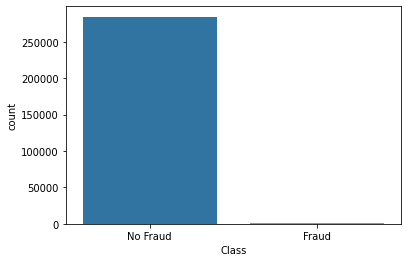

In [8]:
#Visualising Target Variable (Class)
Class_Chart = sns.countplot(df['Class'])
Class_Chart.set_xticklabels(['No Fraud','Fraud'])

In [9]:
#Representative Percentage of Each Class
print('No Fraud =', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of Total Samples')
print('Fraud =', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of Total Samples')
print(df['Class'].value_counts())

No Fraud = 99.83 % of Total Samples
Fraud = 0.17 % of Total Samples
0    284315
1       492
Name: Class, dtype: int64


(0.0, 25691.16)

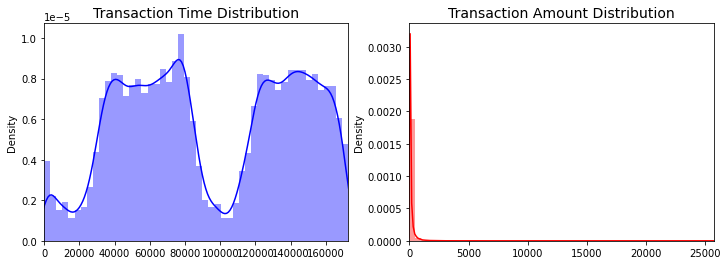

In [10]:
#Showing Distributions of Time and Amount
fig, ax = plt.subplots(1, 2, figsize=(12,4))

time_feature = df['Time'].values
amount_feature = df['Amount'].values

sns.distplot(time_feature, ax=ax[0], color='b')
ax[0].set_title('Transaction Time Distribution', fontsize=14)
ax[0].set_xlim([min(time_feature), max(time_feature)])

sns.distplot(amount_feature, ax=ax[1], color='r')
ax[1].set_title('Transaction Amount Distribution', fontsize=14)
ax[1].set_xlim([min(amount_feature), max(amount_feature)])


In [11]:
#Assigning Input (X) and Target (y) DataFrames
X = df.copy()
X.drop(['Class'], axis = 1, inplace=True)

y = df['Class']

In [12]:
#Splitting for Training and Testing (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, stratify=y)

# 1. Unchanged Samples

### 1.1 XGBoost 

In [73]:
#Creating Model
XGB = XGBClassifier()

#Fitting the Model
XGB.fit(X_train, y_train)

XGBClassifier()

In [74]:
#Creating Predictions
y_pred_XGB = XGB.predict(X_test)

#Evaluating predictions
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_XGB))
print('Precision: %.3f' % precision_score(y_test, y_pred_XGB))
print('Recall: %.3f' % recall_score(y_test, y_pred_XGB))
print('F-measure: %.3f' % f1_score(y_test, y_pred_XGB))

Accuracy: 1.000
Precision: 0.916
Recall: 0.794
F-measure: 0.850


### 1.2 Logistic Regression

In [75]:
#Creating Model
LR = LogisticRegression(solver='liblinear')

#Fitting the Model
LR.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [76]:
#Creating Predictions
y_pred_LR = LR.predict(X_test)

#Evaluating predictions
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_LR))
print('Precision: %.3f' % precision_score(y_test, y_pred_LR))
print('Recall: %.3f' % recall_score(y_test, y_pred_LR))
print('F-measure: %.3f' % f1_score(y_test, y_pred_LR))

Accuracy: 0.999
Precision: 0.860
Recall: 0.677
F-measure: 0.758


### 1.3 Gaussian Naive Bayes

In [77]:
#Creating Model
GNB = GaussianNB()

#Fitting the Model
GNB.fit(X_train, y_train)

GaussianNB()

In [78]:
#Creating Predictions
y_pred_GNB = GNB.predict(X_test)

#Evaluating predictions
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_GNB))
print('Precision: %.3f' % precision_score(y_test, y_pred_GNB))
print('Recall: %.3f' % recall_score(y_test, y_pred_GNB))
print('F-measure: %.3f' % f1_score(y_test, y_pred_GNB))

Accuracy: 0.993
Precision: 0.152
Recall: 0.692
F-measure: 0.250


### 1.4 Random Forests

In [79]:
#Creating Model
RF = RandomForestClassifier(random_state=1, n_estimators=100)

#Fitting the Model
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [80]:
#Creating Predictions
y_pred_RF = RF.predict(X_test)

#Evaluating predictions
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_RF))
print('Precision: %.3f' % precision_score(y_test, y_pred_RF))
print('Recall: %.3f' % recall_score(y_test, y_pred_RF))
print('F-measure: %.3f' % f1_score(y_test, y_pred_RF))

Accuracy: 1.000
Precision: 0.943
Recall: 0.776
F-measure: 0.852


# 2. Undersampling

In [81]:
#Undersampling Larger Class
factor = 1.0
undersample = RandomUnderSampler(sampling_strategy=factor)

#Fitting and Applying Transformation
X_under, y_under = undersample.fit_resample(X, y)

#Verifying Class Distribution
print(Counter(y_under))

Counter({0: 492, 1: 492})


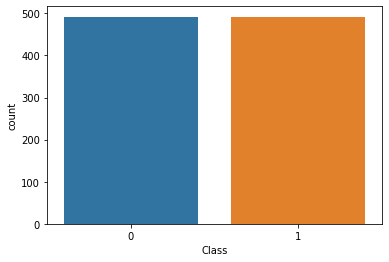

In [82]:
#Viewing Distribution in Histogram
sns.countplot(y_under)

In [83]:
#Splitting for Training and Testing (50/50)
X_Utrain, X_Utest, y_Utrain, y_Utest = train_test_split(X_under, y_under, 
                                                        test_size = 0.5, 
                                                        stratify=y_under)

### 2.1 XGBoost Undersampling 

In [84]:
#Creating Model
XGB_U = XGBClassifier()

#Fitting the Model
XGB_U.fit(X_Utrain, y_Utrain)

XGBClassifier()

In [85]:
#Creating Predictions
y_pred_XGB_U = XGB_U.predict(X_Utest)

#Evaluating predictions
print('Accuracy: %.3f' % accuracy_score(y_Utest, y_pred_XGB_U))
print('Precision: %.3f' % precision_score(y_Utest, y_pred_XGB_U))
print('Recall: %.3f' % recall_score(y_Utest, y_pred_XGB_U))
print('F-measure: %.3f' % f1_score(y_Utest, y_pred_XGB_U))

Accuracy: 0.945
Precision: 0.954
Recall: 0.935
F-measure: 0.945


### 2.2 Logistic Regression Undersampling

In [86]:
#Creating Model
LR_U = LogisticRegression(solver='liblinear')

#Fitting the Model
LR_U.fit(X_Utrain, y_Utrain)

LogisticRegression(solver='liblinear')

In [87]:
#Creating Predictions
y_pred_LR_U = LR_U.predict(X_Utest)

#Evaluating predictions
print('Accuracy: %.3f' % accuracy_score(y_Utest, y_pred_LR_U))
print('Precision: %.3f' % precision_score(y_Utest, y_pred_LR_U))
print('Recall: %.3f' % recall_score(y_Utest, y_pred_LR_U))
print('F-measure: %.3f' % f1_score(y_Utest, y_pred_LR_U))

Accuracy: 0.945
Precision: 0.958
Recall: 0.931
F-measure: 0.944


### 2.3 Gaussian Naive Bayes Undersampling

In [88]:
#Creating Model
GNB_U = GaussianNB()

#Fitting the Model
GNB_U.fit(X_Utrain, y_Utrain)

GaussianNB()

In [89]:
#Creating Predictions
y_pred_GNB_U = GNB.predict(X_Utest)

#Evaluating predictions
print('Accuracy: %.3f' % accuracy_score(y_Utest, y_pred_GNB_U))
print('Precision: %.3f' % precision_score(y_Utest, y_pred_GNB_U))
print('Recall: %.3f' % recall_score(y_Utest, y_pred_GNB_U))
print('F-measure: %.3f' % f1_score(y_Utest, y_pred_GNB_U))

Accuracy: 0.856
Precision: 0.994
Recall: 0.715
F-measure: 0.832


### 2.4 Random Forests Undersampling

In [90]:
#Creating Model
RF_U = RandomForestClassifier(random_state=1, n_estimators=100)

#Fitting the Model
RF_U.fit(X_Utrain, y_Utrain)

RandomForestClassifier(random_state=1)

In [91]:
#Creating Predictions
y_pred_RF_U = RF.predict(X_Utest)

#Evaluating predictions
print('Accuracy: %.3f' % accuracy_score(y_Utest, y_pred_RF_U))
print('Precision: %.3f' % precision_score(y_Utest, y_pred_RF_U))
print('Recall: %.3f' % recall_score(y_Utest, y_pred_RF_U))
print('F-measure: %.3f' % f1_score(y_Utest, y_pred_RF_U))

Accuracy: 0.939
Precision: 1.000
Recall: 0.878
F-measure: 0.935


# 3. Oversampling

In [92]:
#Oversampling Smaller Class
factor = 1.0
oversample = RandomOverSampler(sampling_strategy=factor)

#Fitting and Applying Transformation
X_over, y_over = oversample.fit_resample(X, y)

#Verifying Class Distribution
print(Counter(y_over))

Counter({0: 284315, 1: 284315})


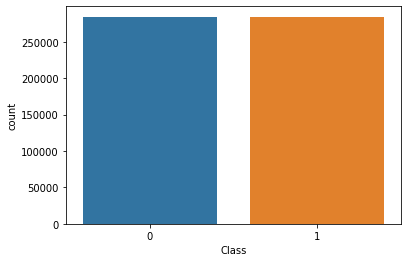

In [93]:
#Viewing Distribution in Histogram
sns.countplot(y_over)

In [94]:
#Splitting for Training and Testing (50/50)
X_Otrain, X_Otest, y_Otrain, y_Otest = train_test_split(X_over, y_over, 
                                                        test_size = 0.5, 
                                                        stratify=y_over)

### 3.1 XGBoost Oversampling 

In [95]:
#Creating Model
XGB_O = XGBClassifier()

#Fitting the Model
XGB_O.fit(X_Otrain, y_Otrain)

XGBClassifier()

In [96]:
#Creating Predictions
y_pred_XGB_O = XGB_O.predict(X_Otest)

#Evaluating predictions
print('Accuracy: %.3f' % accuracy_score(y_Otest, y_pred_XGB_O))
print('Precision: %.3f' % precision_score(y_Otest, y_pred_XGB_O))
print('Recall: %.3f' % recall_score(y_Otest, y_pred_XGB_O))
print('F-measure: %.3f' % f1_score(y_Otest, y_pred_XGB_O))

Accuracy: 0.992
Precision: 0.992
Recall: 0.992
F-measure: 0.992


### 3.2 Logistic Regression Oversampling

In [97]:
#Creating Model
LR_O = LogisticRegression(solver='liblinear')

#Fitting the Model
LR_O.fit(X_Otrain, y_Otrain)

LogisticRegression(solver='liblinear')

In [98]:
#Creating Predictions
y_pred_LR_O = LR_O.predict(X_Otest)

#Evaluating predictions
print('Accuracy: %.3f' % accuracy_score(y_Otest, y_pred_LR_O))
print('Precision: %.3f' % precision_score(y_Otest, y_pred_LR_O))
print('Recall: %.3f' % recall_score(y_Otest, y_pred_LR_O))
print('F-measure: %.3f' % f1_score(y_Otest, y_pred_LR_O))

Accuracy: 0.937
Precision: 0.973
Recall: 0.900
F-measure: 0.935


### 3.3 Gaussian Naive Bayes Oversampling

In [99]:
#Creating Model
GNB_O = GaussianNB()

#Fitting the Model
GNB_O.fit(X_Otrain, y_Otrain)

GaussianNB()

In [100]:
#Creating Predictions
y_pred_GNB_O = GNB_O.predict(X_Otest)

#Evaluating predictions
print('Accuracy: %.3f' % accuracy_score(y_Otest, y_pred_GNB_O))
print('Precision: %.3f' % precision_score(y_Otest, y_pred_GNB_O))
print('Recall: %.3f' % recall_score(y_Otest, y_pred_GNB_O))
print('F-measure: %.3f' % f1_score(y_Otest, y_pred_GNB_O))

Accuracy: 0.866
Precision: 0.988
Recall: 0.741
F-measure: 0.847


### 3.4 Random Forests Oversampling

In [101]:
#Creating Model
RF_O = RandomForestClassifier(random_state=1, n_estimators=100)

#Fitting the Model
RF_O.fit(X_Otrain, y_Otrain)

RandomForestClassifier(random_state=1)

In [102]:
#Creating Predictions
y_pred_RF_O = RF_O.predict(X_Otest)

#Evaluating predictions
print('Accuracy: %.3f' % accuracy_score(y_Otest, y_pred_RF_O))
print('Precision: %.3f' % precision_score(y_Otest, y_pred_RF_O))
print('Recall: %.3f' % recall_score(y_Otest, y_pred_RF_O))
print('F-measure: %.3f' % f1_score(y_Otest, y_pred_RF_O))

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F-measure: 1.000


# 4. Table of Sampling Methods & Model Scores

###4.1 XGBoost Results

In [104]:
scores = ['Accuracy', 'Precision', 'Recall', 'F score']
default = [1.0, 0.916, 0.794, .850]
under = [0.945, 0.954, 0.935, 0.945]
over = [0.992, 0.992, 0.992, 0.992]

XBG_results = {'Scores': scores, 'Default': default, 'Undersampled': under, 'Oversampled': over}
XGB_results_df = pd.DataFrame(data=XBG_results)
print('XGBoost and Sampling Techniques:')
XGB_results_df

XGBoost and Sampling Techniques:


,Scores,Default,Undersampled,Oversampled
0,Accuracy,1.000,0.945,0.992
1,Precision,0.916,0.954,0.992
2,Recall,0.794,0.935,0.992
3,F score,0.850,0.945,0.992


###4.2 Logistic Regression Results

In [105]:
scores = ['Accuracy', 'Precision', 'Recall', 'F score']
default = [0.999, 0.860, 0.677, 0.758]
under = [0.945, 0.958, 0.931, 0.944]
over = [0.937, 0.973, 0.900, 0.935]

LR_results = {'Scores': scores, 'Default': default, 'Undersampled': under, 'Oversampled': over}
LR_results_df = pd.DataFrame(data=LR_results)
print('Logistic Regression and Sampling Techniques:')
LR_results_df

Logistic Regression and Sampling Techniques:


,Scores,Default,Undersampled,Oversampled
0,Accuracy,0.999,0.945,0.937
1,Precision,0.860,0.958,0.973
2,Recall,0.677,0.931,0.900
3,F score,0.758,0.944,0.935


###4.3 Gaussian Naive Bayes Results

In [106]:
scores = ['Accuracy', 'Precision', 'Recall', 'F score']
default = [0.993, 0.152, 0.692, 0.250]
under = [0.856, 0.994, 0.715, 0.832]
over = [0.866, 0.988, 0.741, 0.847]

GNB_results = {'Scores': scores, 'Default': default, 'Undersampled': under, 'Oversampled': over}
GNB_results_df = pd.DataFrame(data=GNB_results)
print('Gaussian Naive Bayes and Sampling Techniques:')
GNB_results_df

Gaussian Naive Bayes and Sampling Techniques:


,Scores,Default,Undersampled,Oversampled
0,Accuracy,0.993,0.856,0.866
1,Precision,0.152,0.994,0.988
2,Recall,0.692,0.715,0.741
3,F score,0.250,0.832,0.847


###4.1 Random Forests Results

In [107]:
scores = ['Accuracy', 'Precision', 'Recall', 'F score']
default = [1.000, 0.943, 0.776, 0.852]
under = [0.939, 1.000, 0.878, 0.935]
over = [1.000, 1.000, 1.000, 1.000]

RF_results = {'Scores': scores, 'Default': default, 'Undersampled': under, 'Oversampled': over}
RF_results_df = pd.DataFrame(data=RF_results)
print('Random Forests and Sampling Techniques:')
RF_results_df

Random Forests and Sampling Techniques:


,Scores,Default,Undersampled,Oversampled
0,Accuracy,1.000,0.939,1.0
1,Precision,0.943,1.000,1.0
2,Recall,0.776,0.878,1.0
3,F score,0.852,0.935,1.0


**XGBoost**
*   This model was most consistent when Oversampled. 
*   However, it was 100% accurate under default sampling.

**Logistic Regression**
*   This model performed slightly better when undersampled.  
*   It was most accurate under default sampling.

**Gaussian Naive Bayes**
*   Overall the poorest performing model - usually regarded as a model that performs better with smaller datasets.
*   While accuracy decreased for under/over, the very poor precision score in default was almost perfect when over and under sampled.
*   The same can be said for F score, while recall slightly improved.

**Random Forests**
*   When oversampled, this was the best performing model of all. It received perfect scores in all 4 metrics. 
*   When undersampled, accuracy dropped compared with default, yet it performed much higher in the other 3 metrics.


